In [1]:
import numpy as np
import pandas as pd

from helpers.cell_type_naming import weird_to_nice
from helpers import creating_mixtures
from helpers.loading_single_cell_cohorts import load_jerby_arnon

In [2]:
import plotly.express as px
import plotly.figure_factory as ff
import plotly.graph_objects as go
import plotly.io

plotly.io.renderers.default = "jupyterlab+png"

In [3]:
rng = np.random.default_rng(seed=0)

# load & prep data

In [4]:
!gsutil ls gs://liulab/downloaded_manually/derek_csx_tcga_skcm

gs://liulab/downloaded_manually/derek_csx_tcga_skcm/CIBERSORTx_Job6_cell_type_sourceGEP.txt
gs://liulab/downloaded_manually/derek_csx_tcga_skcm/CIBERSORTx_Job6_jerbyarnon_for_cibersortx_sigmatrix_inferred_phenoclasses.CIBERSORTx_Job6_jerbyarnon_for_cibersortx_sigmatrix_inferred_refsample.bm.K999.txt
gs://liulab/downloaded_manually/derek_csx_tcga_skcm/CIBERSORTx_Job7_Results.csv
gs://liulab/downloaded_manually/derek_csx_tcga_skcm/CIBERSORTx_Job7_Results.html
gs://liulab/downloaded_manually/derek_csx_tcga_skcm/CIBERSORTx_Job7_Results.pdf
gs://liulab/downloaded_manually/derek_csx_tcga_skcm/CIBERSORTx_Job7_Results.txt
gs://liulab/downloaded_manually/derek_csx_tcga_skcm/CIBERSORTx_Job7_error_log.txt
gs://liulab/downloaded_manually/derek_csx_tcga_skcm/CIBERSORTx_Job7_jerbyarnon_for_cibersortx_sigmatrix_inferred_phenoclasses.CIBERSORTx_Job7_jerbyarnon_for_cibersortx_sigmatrix_inferred_refsample.bm.K999.txt
gs://liulab/downloaded_manually/derek_csx_tcga_skcm/CIBERSORTx_Job7_runtime_log.txt
gs:

## load (real) TCGA SKCM mixtures

In [5]:
# mixtures_tcga_skcm = helpers.datasets.load_tcga_skcm_mixtures()

In [6]:
%time

path = "gs://liulab/downloaded_manually/derek_csx_tcga_skcm/skcm_rnaseqv2_normalized_clean.txt"

mixtures_tcga_skcm = pd.read_csv(
    path,
    sep="\t",
    # nrows=1000,
    index_col=0
)

# mixtures_tcga_skcm *= 1_000_000 / mixtures_tcga_skcm.sum()
# mixtures_tcga_skcm = helpers.creating_mixtures.normalize_to_tp100k(mixtures_tcga_skcm)

CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 7.39 µs


In [7]:
mixtures_tcga_skcm

,TCGA.3N.A9WB.06A.11R.A38C.07,TCGA.3N.A9WC.06A.11R.A38C.07,TCGA.3N.A9WD.06A.11R.A38C.07,TCGA.BF.A1PU.01A.11R.A18S.07,TCGA.BF.A1PV.01A.11R.A18U.07,TCGA.BF.A1PX.01A.12R.A18T.07,TCGA.BF.A1PZ.01A.11R.A18S.07,TCGA.BF.A1Q0.01A.21R.A18S.07,TCGA.BF.A3DJ.01A.11R.A20F.07,TCGA.BF.A3DL.01A.11R.A20F.07,...,TCGA.XV.AB01.06A.12R.A40A.07,TCGA.YD.A89C.06A.11R.A37K.07,TCGA.YD.A9TA.06A.11R.A39D.07,TCGA.YD.A9TB.06A.12R.A40A.07,TCGA.YG.AA3N.01A.11R.A38C.07,TCGA.YG.AA3O.06A.11R.A38C.07,TCGA.YG.AA3P.06A.11R.A38C.07,TCGA.Z2.A8RT.06A.11R.A37K.07,TCGA.Z2.AA3S.06A.11R.A39D.07,TCGA.Z2.AA3V.06A.11R.A39D.07
gene_id,,,,,,,,,,,,,,,,,,,,,
A1BG,381.0662,195.1822,360.8794,176.3994,216.8470,285.0608,424.5848,327.8758,232.2936,380.7694,...,428.9256,184.5297,88.4289,264.5184,238.8846,207.9831,33.5642,336.4070,349.4478,717.2209
A1CF,0.0000,0.0000,0.7092,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,...,0.0000,0.0000,1.3482,0.0000,0.0000,0.0000,0.0000,0.3876,0.0000,0.0000
A2BP1,0.0000,0.0000,6.3830,1.2987,0.0000,0.0000,0.0000,0.0000,0.0000,0.4901,...,0.0000,0.0000,0.0000,0.0000,0.5522,0.3380,66.0629,0.0000,0.2880,0.6539
A2LD1,250.1979,160.7548,97.1986,163.2338,60.8727,125.6900,78.8939,67.7049,92.9554,99.8579,...,47.5207,102.4404,36.9476,146.3544,88.2441,86.2831,50.0426,37.3178,152.9786,50.7438
A2M,2209.5194,169236.6356,18257.8865,6716.4513,1740.5828,32098.0014,3218.6418,6468.7807,377755.5402,7726.0377,...,17450.3581,20639.7659,12397.0606,25477.7594,10300.9056,37319.7533,8217.0591,22129.9496,4040.2938,46111.4664
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ZYG11A,7.2698,0.8030,15.6028,0.0000,0.0000,5.5613,1.2222,9.5047,1.7232,0.0000,...,0.0000,0.4335,1.0112,0.0000,0.5522,1.0139,0.0000,1.9380,0.0000,0.0000
ZYG11B,644.5880,690.1536,849.6454,436.0390,991.6318,500.5214,737.6060,1013.4790,945.7177,180.8380,...,146.0055,760.7282,917.7922,1028.7387,565.4335,994.0008,922.2163,478.2946,1629.4910,75.8542
ZYX,1236.2682,3594.4996,3270.2128,5132.1429,5128.2128,4675.7039,3177.7557,10974.0171,3042.2195,7198.7258,...,11526.1708,5296.0555,3701.5035,3021.2879,10181.1154,3125.3063,1925.4129,2865.1163,2136.9429,11832.5977


## generate in silico mixtures

### load single cell cohort (Jerby-Arnon)

In [8]:
%time

sc_data, sc_metadata = load_jerby_arnon(
    # n_genes_if_not_all=1000
)

CPU times: user 2 µs, sys: 0 ns, total: 2 µs
Wall time: 4.29 µs


In [9]:
sc_data

cells,cy78_CD45_neg_1_B04_S496_comb,cy79_p4_CD45_neg_PDL1_neg_E11_S1115_comb,CY88_5_B10_S694_comb,cy79_p1_CD45_neg_PDL1_pos_AS_C1_R1_F07_S67_comb,cy78_CD45_neg_3_H06_S762_comb,cy79_p1_CD45_neg_PDL1_pos_AS_C1_R1_G01_S73_comb,cy79_p1_CD45_neg_PDL1_neg_AS_C4_R1_D09_S141_comb,CY88_3_D02_S614_comb,cy79_p1_CD45_neg_PDL1_neg_AS_C4_R1_D06_S138_comb,cy53_1_CD45_neg_C06_S318_comb,...,monika_C11_S119_comb_BCD8_3,CY75_1_CD45_CD8_8__S331_comb_BCD8,CY75_1_CD45_CD8_7__S210_comb_BCD8,CY75_1_CD45_CD8_3__S142_comb_BCD8,CY75_1_CD45_CD8_7__S280_comb_BCD8,CY75_1_CD45_CD8_3__S168_comb_BCD8,CY75_1_CD45_CD8_8__S338_comb_BCD8,monika_D7_S132_comb_BCD8_3,CY75_1_CD45_CD8_8__S289_comb_BCD8,CY75_1_CD45_CD8_8__S351_comb_BCD8
GeneSymbol,,,,,,,,,,,,,,,,,,,,,
A1BG,1.843984,0.000000,0.000000,0.000000,2.364572,0.000000,1.372395,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.303635,0.000000,0.000000
A1BG-AS1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.319040,...,0.000000,0.000000,0.000000,0.000000,0.000000,5.190141,0.000000,2.510962,0.000000,0.000000
A1CF,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.014355,0.000000,0.059355,...,0.000000,0.000000,1.539035,0.000000,0.000000,0.243669,0.000000,0.089498,0.486457,0.000000
A2M,0.000000,8.060047,5.790928,6.773561,0.000000,7.648149,8.744242,7.569240,8.199358,0.000000,...,0.000000,0.000000,0.510962,0.000000,4.629357,0.000000,0.000000,0.000000,0.000000,0.000000
A2M-AS1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ZYG11A,0.534062,0.000000,1.348799,0.000000,0.425459,1.282736,0.859970,0.335712,1.801159,0.476122,...,0.848798,0.813935,3.527821,0.000000,0.000000,1.638769,0.332278,0.582074,3.265287,1.141433
ZYG11B,0.077243,0.000000,0.366252,2.668346,0.333424,0.487486,0.752749,0.347099,2.089498,1.576764,...,1.048934,1.162855,1.909197,0.000000,0.085425,0.896853,1.519039,0.335712,2.403813,0.382944
ZYX,1.906121,0.000000,0.000000,0.000000,0.000000,0.909965,1.767655,0.000000,2.687509,2.779470,...,0.000000,0.000000,4.297338,4.802193,0.000000,0.000000,2.733354,0.000000,0.000000,4.086614


In [10]:
sc_metadata

,cells,samples,cell.types,treatment.group,Cohort,no.of.genes,no.of.reads
0,cy78_CD45_neg_1_B04_S496_comb,Mel78,Malignant,post.treatment,Tirosh,8258,357919
1,cy79_p4_CD45_neg_PDL1_neg_E11_S1115_comb,Mel79,Malignant,treatment.naive,Tirosh,2047,5727
2,CY88_5_B10_S694_comb,Mel88,Malignant,post.treatment,Tirosh,5375,139218
3,cy79_p1_CD45_neg_PDL1_pos_AS_C1_R1_F07_S67_comb,Mel79,Malignant,treatment.naive,Tirosh,5648,73996
4,cy78_CD45_neg_3_H06_S762_comb,Mel78,Malignant,post.treatment,Tirosh,7409,380341
...,...,...,...,...,...,...,...
7181,CY75_1_CD45_CD8_3__S168_comb_BCD8,Mel75,T CD8,post.treatment,Tirosh,3530,137245
7182,CY75_1_CD45_CD8_8__S338_comb_BCD8,Mel75,T CD8,post.treatment,Tirosh,3872,106432
7183,monika_D7_S132_comb_BCD8_3,Mel75,T CD8,post.treatment,Tirosh,4589,908173
7184,CY75_1_CD45_CD8_8__S289_comb_BCD8,Mel75,T CD8,post.treatment,Tirosh,4614,140903


In [11]:
sc_metadata["cell.types"].value_counts(dropna=False)

Malignant      2018
T CD8          1759
T CD4           856
B               818
T               706
Macrophage      420
NaN             307
CAF             106
Endothelial     104
NK               92
Name: cell.types, dtype: int64

### load fractions produced by derek

In [12]:
# !gsutil ls gs://liulab/downloaded_manually/derek_csx_tcga_skcm

In [13]:
%time

path = "gs://liulab/downloaded_manually/derek_csx_tcga_skcm/CIBERSORTx_Job8_Results.txt"

csx_fraction_output_tcga_skcm = pd.read_csv(
    path,
    sep="\t",
    # nrows=10,
    index_col=0
)
csx_fraction_output_tcga_skcm.rename(columns=weird_to_nice, inplace=True)
columns = list(sorted(csx_fraction_output_tcga_skcm.columns[:-3]))
csx_fraction_output_tcga_skcm = csx_fraction_output_tcga_skcm[columns]

CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 6.91 µs


In [14]:
csx_fraction_output_tcga_skcm

,B,CAF,Endothelial,Macrophage,Malignant,NK,T,T CD4,T CD8
Mixture,,,,,,,,,
TCGA.3N.A9WB.06A.11R.A38C.07,0.000000,0.018483,0.004211,0.000000,0.971059,0.000000,0.006247,0.000000,0.000000
TCGA.3N.A9WC.06A.11R.A38C.07,0.035060,0.056463,0.004178,0.103408,0.669623,0.000000,0.000000,0.082836,0.048432
TCGA.3N.A9WD.06A.11R.A38C.07,0.044227,0.105762,0.070834,0.036322,0.703525,0.000000,0.000000,0.039330,0.000000
TCGA.BF.A1PU.01A.11R.A18S.07,0.020758,0.048434,0.015335,0.000000,0.912796,0.002677,0.000000,0.000000,0.000000
TCGA.BF.A1PV.01A.11R.A18U.07,0.003591,0.042464,0.000000,0.000000,0.944365,0.000000,0.000000,0.009580,0.000000
...,...,...,...,...,...,...,...,...,...
TCGA.YG.AA3O.06A.11R.A38C.07,0.007658,0.060723,0.000000,0.026970,0.896399,0.000000,0.008250,0.000000,0.000000
TCGA.YG.AA3P.06A.11R.A38C.07,0.000000,0.000000,0.002483,0.008485,0.969895,0.000000,0.019137,0.000000,0.000000
TCGA.Z2.A8RT.06A.11R.A37K.07,0.029734,0.026755,0.002953,0.044928,0.878121,0.000000,0.000000,0.017508,0.000000


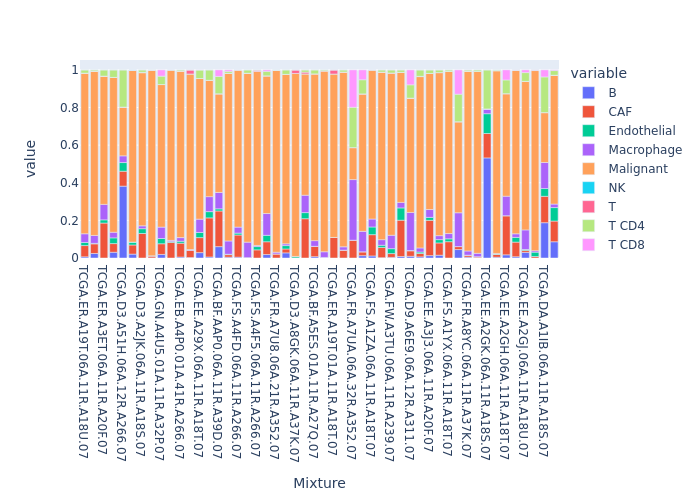

In [15]:
px.bar(csx_fraction_output_tcga_skcm.sample(50))

In [16]:
# QA
# do all rows start with "TCGA"?
assert not any(filter(lambda name: name[0:4] != 'TCGA', csx_fraction_output_tcga_skcm.index))

### compute mixtures

In [17]:
import importlib
import helpers
importlib.reload(helpers.creating_mixtures)

<module 'helpers.creating_mixtures' from '/home/jupyter/deconv/helpers/creating_mixtures.py'>

In [18]:
# params
rng = np.random.default_rng(seed=0)

In [19]:
%time

mixtures_in_silico, cell_type_geps = creating_mixtures.make_mixtures(
    sc_data,
    sc_metadata,
    sample_fractions=csx_fraction_output_tcga_skcm,
    n_cells_per_gep=5,
    normalization_factor=1_000_000,
    rng=rng
)

CPU times: user 3 µs, sys: 1 µs, total: 4 µs
Wall time: 8.11 µs


In [20]:
mixtures_in_silico

,TCGA.3N.A9WB.06A.11R.A38C.07,TCGA.3N.A9WC.06A.11R.A38C.07,TCGA.3N.A9WD.06A.11R.A38C.07,TCGA.BF.A1PU.01A.11R.A18S.07,TCGA.BF.A1PV.01A.11R.A18U.07,TCGA.BF.A1PX.01A.12R.A18T.07,TCGA.BF.A1PZ.01A.11R.A18S.07,TCGA.BF.A1Q0.01A.21R.A18S.07,TCGA.BF.A3DJ.01A.11R.A20F.07,TCGA.BF.A3DL.01A.11R.A20F.07,...,TCGA.XV.AB01.06A.12R.A40A.07,TCGA.YD.A89C.06A.11R.A37K.07,TCGA.YD.A9TA.06A.11R.A39D.07,TCGA.YD.A9TB.06A.12R.A40A.07,TCGA.YG.AA3N.01A.11R.A38C.07,TCGA.YG.AA3O.06A.11R.A38C.07,TCGA.YG.AA3P.06A.11R.A38C.07,TCGA.Z2.A8RT.06A.11R.A37K.07,TCGA.Z2.AA3S.06A.11R.A39D.07,TCGA.Z2.AA3V.06A.11R.A39D.07
GeneSymbol,,,,,,,,,,,,,,,,,,,,,
A1BG,102.596015,4.857875,22.897862,13.153016,138.829501,22.713983,34.815189,81.511178,28.653625,40.641334,...,10.082184,0.855931,3.769918,6.738753,0.951884,4.333193,81.283846,85.708784,0.000000,32.225911
A1BG-AS1,36.655096,6.036207,18.373631,1.945442,1.614766,7.683568,0.706085,18.343759,4.555634,43.467896,...,29.592673,41.538374,10.262674,9.328216,12.180748,4.355167,5.199399,38.318102,0.470873,0.621402
A1CF,0.082036,1.886997,0.573002,0.308700,0.612776,2.911831,1.208187,0.498305,4.097751,1.750507,...,1.137962,1.692067,1.420036,0.319788,1.885187,1.338391,0.077873,1.453165,1.352207,0.830197
A2M,113.643426,263.058818,197.621936,15.961502,7.142946,131.481071,505.021729,84.313385,533.484522,317.805170,...,14.767832,0.765040,182.196659,201.339910,284.922150,93.505433,408.909200,23.577014,3.605084,155.380881
A2M-AS1,4.607226,8.671158,34.123400,1.959282,0.298973,0.000000,0.024343,13.395491,2.316300,0.565381,...,0.000000,0.021889,2.052203,0.203516,12.574194,0.000000,58.504955,0.111361,39.562655,0.777710
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ZYG11A,33.546092,53.211661,20.707945,21.949743,8.405378,36.465129,40.250782,62.066836,70.611751,52.966909,...,29.475853,23.319810,51.528992,35.627033,42.939868,50.508251,26.615935,47.780231,54.572635,38.277562
ZYG11B,75.192495,61.627069,60.211132,23.707904,6.209604,89.092654,22.016676,49.337325,44.954764,41.733408,...,73.887898,14.738958,67.594532,91.387173,52.895105,126.773779,23.584503,94.504590,89.606565,26.720998
ZYX,151.983245,47.891167,67.364475,57.680154,54.154472,120.473478,57.136805,209.449114,102.203991,108.357623,...,71.829326,67.189644,151.982099,154.889989,110.674527,177.788866,187.184295,50.868404,31.537303,40.340702


In [21]:
sample_name = "TCGA.3N.A9WB.06A.11R.A38C.07"
cell_type_geps[sample_name]

,B,CAF,Endothelial,Macrophage,Malignant,NK,T,T CD4,T CD8
GeneSymbol,,,,,,,,,
A1BG,0.000000,29.788678,0.000000,35.790544,95.991963,0.000000,0.000000,0.000000,7.792351
A1BG-AS1,0.000000,2.091124,0.000000,0.000000,39.751667,86.606146,3.925311,0.000000,0.000000
A1CF,18.821122,2.410409,2.136601,0.531821,0.000000,7.170785,3.958239,20.557379,3.406108
A2M,0.000000,286.452060,603.065403,307.715524,102.620084,45.987903,0.000000,42.843920,56.754015
A2M-AS1,0.000000,0.000000,17.017035,0.000000,4.248825,0.000000,31.544843,0.000000,16.050315
...,...,...,...,...,...,...,...,...,...
ZYG11A,114.288971,48.791614,76.649326,52.988500,35.574870,112.247873,87.938766,108.208537,98.723355
ZYG11B,102.451207,80.497610,43.329706,48.941634,80.247441,64.138167,100.793605,94.171509,87.565345
ZYX,93.888622,210.641828,33.480847,278.252844,143.278241,220.437124,124.486404,216.335426,132.566635


## data checks

### similar normalization?

In [22]:
mixtures_tcga_skcm.sum()

TCGA.3N.A9WB.06A.11R.A38C.07    1.930341e+07
TCGA.3N.A9WC.06A.11R.A38C.07    1.882303e+07
TCGA.3N.A9WD.06A.11R.A38C.07    2.531152e+07
TCGA.BF.A1PU.01A.11R.A18S.07    2.110997e+07
TCGA.BF.A1PV.01A.11R.A18U.07    1.737425e+07
                                    ...     
TCGA.YG.AA3O.06A.11R.A38C.07    1.794965e+07
TCGA.YG.AA3P.06A.11R.A38C.07    2.074780e+07
TCGA.Z2.A8RT.06A.11R.A37K.07    1.929633e+07
TCGA.Z2.AA3S.06A.11R.A39D.07    1.840130e+07
TCGA.Z2.AA3V.06A.11R.A39D.07    2.753077e+07
Length: 473, dtype: float64

In [23]:
mixtures_in_silico.sum()

TCGA.3N.A9WB.06A.11R.A38C.07    1000000.0
TCGA.3N.A9WC.06A.11R.A38C.07    1000000.0
TCGA.3N.A9WD.06A.11R.A38C.07    1000000.0
TCGA.BF.A1PU.01A.11R.A18S.07    1000000.0
TCGA.BF.A1PV.01A.11R.A18U.07    1000000.0
                                  ...    
TCGA.YG.AA3O.06A.11R.A38C.07    1000000.0
TCGA.YG.AA3P.06A.11R.A38C.07    1000000.0
TCGA.Z2.A8RT.06A.11R.A37K.07    1000000.0
TCGA.Z2.AA3S.06A.11R.A39D.07    1000000.0
TCGA.Z2.AA3V.06A.11R.A39D.07    1000000.0
Length: 473, dtype: float64

In [24]:
mixtures_tcga_skcm.mean(axis=1).describe()

count     20531.000000
mean        974.490249
std        3519.382042
min           0.000000
25%          13.408087
50%         229.683289
75%         897.250173
max      190102.125895
dtype: float64

In [25]:
mixtures_in_silico.mean(axis=1).describe()

count    23686.000000
mean        42.219032
std         76.115837
min          0.000000
25%          1.165310
50%         13.723649
75%         51.327721
max       1077.253507
dtype: float64

### same genes in real & in silico?

looks like not really... # rows in expression data:
- TCGA SKCM: 20,531
- in silico mixtures (jerby-arnon): 23,686
- overlap: 18,762

In [26]:
mixtures_tcga_skcm.shape

(20531, 473)

In [27]:
mixtures_in_silico.shape

(23686, 473)

In [28]:
len(list(set(mixtures_tcga_skcm.index) & set(mixtures_in_silico.index)))

18762

random genes in jerby-arnon, not in TCGA SKCM:

In [29]:
#todo

random genes in TCGA SKCM, not in jerby-arnon:

In [30]:
#todo

# output 1: check distribution (in silico vs real)

## plot summary stats

by gene, in silico vs real

In [39]:
def prep_for_plots(mixtures):
    mean_expression_per_gene = mixtures.mean(axis=1)
    return np.log(mean_expression_per_gene + 1)

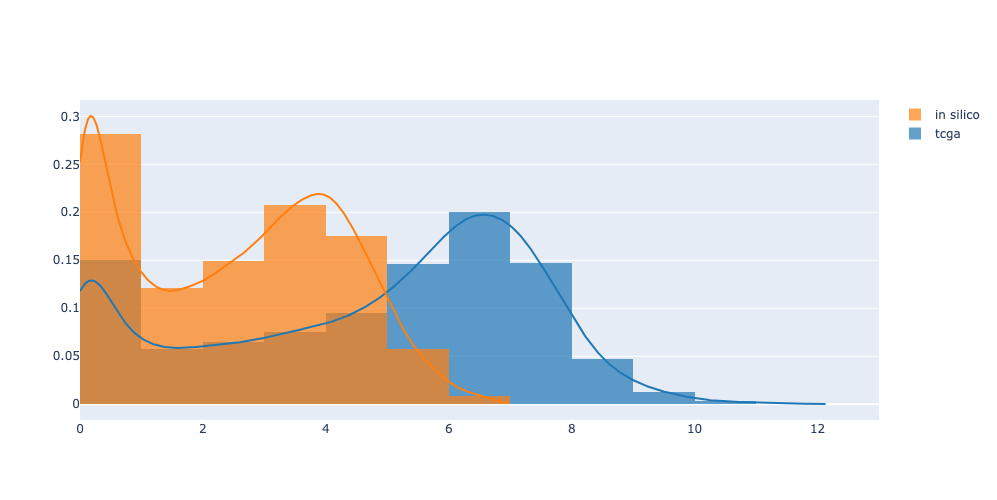

In [41]:
series = [
    prep_for_plots(mixtures_tcga_skcm),
    prep_for_plots(mixtures_in_silico),
]

ff.create_distplot(
    series, ["tcga", "in silico"], show_rug=False, show_hist=True
)

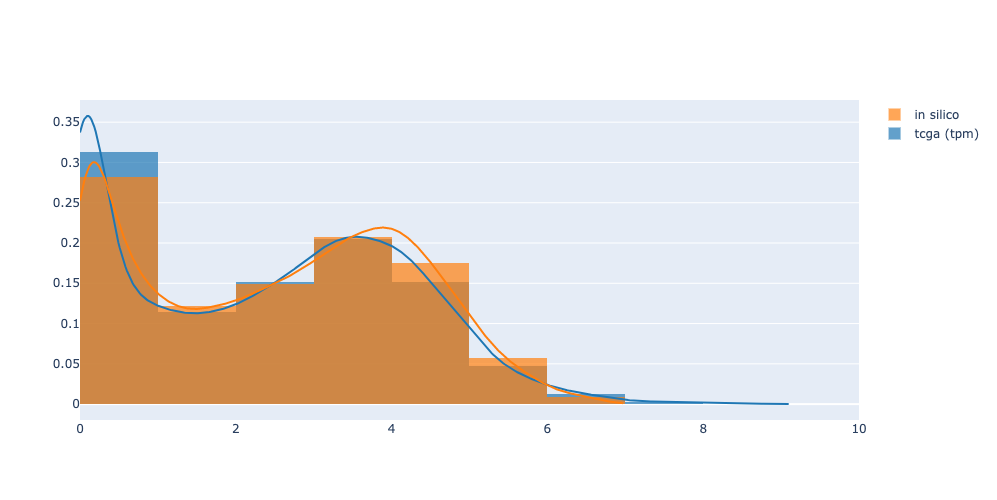

In [42]:
mixtures_tcga_skcm_per_million = helpers.creating_mixtures.normalize_expression(
    mixtures_tcga_skcm, 1_000_000
)

series = [
    prep_for_plots(mixtures_tcga_skcm_per_million),
    prep_for_plots(mixtures_in_silico),
]

ff.create_distplot(series, ["tcga (tpm)", "in silico"], show_rug=False, show_hist=True)

In [ ]:
def compute_means(mixtures):
    base_means = mixtures_tcga_skcm.mean(axis=1)
    return np.log(base_means + 1)


mean_expressions = pd.DataFrame({
    "TCGA SKCM": compute_means(mixtures_tcga_skcm),
    "in silico": compute_means(mixtures_in_silico),
})

In [ ]:
compute_means(mixtures_tcga_skcm)

In [ ]:
compute_means(mixtures_in_silico)

In [ ]:
px.box(compute_means(mixtures_tcga_skcm))

In [ ]:
px.box([compute_means(mixtures_tcga_skcm), compute_means(mixtures_in_silico)])

# output 2: estimated cell type fractions

## run cibersortx fractions on in silico mixtures

In [ ]:
import tempfile

In [ ]:
temp_dir = tempfile.TemporaryDirectory()

print(temp_dir)

In [ ]:
from helpers.running_csx import DockerJob, Experiment, InputFile

In [ ]:
experiments_root = "gs://liulab/csx_experiments/tcga_skcm_fractions"
experiment = Experiment(experiments_root, "test1")

In [ ]:
!tree -h {experiment.local_path}/..

In [ ]:
input_file_args = {
    "mixture": InputFile("mixturestirosh.txt", "gs://liulab/csx_example_files/Single_Cell_RNA-Seq_Melanoma_SuppFig_3b-d/mixture_melanoma_Tirosh_SuppFig_3b-d.txt"),
    "sigmatrix": InputFile()
}


In [ ]:

job = DockerJob(temp_dir, input_file_args, other_args)
    for copy_command in job.make_copy_commands():
        !{copy_command}
    !tree -h {job.path}
    docker_command = job.make_docker_command()
    print(docker_command)
    !{docker_command}
    !tree -h {job.path}
    !gsutil -m rsync -r -d {job.path} {experiment.gcs_uri}


### prep input files

In [ ]:
from helpers.csx_docker import save_valid_mixture_file, save_valid_fractions_file

with open("mixture.txt", "w") as f:
    save_valid_mixture_file(mixtures, f)
with open("fractions.txt", "w") as f:
    save_valid_fractions_file(fractions, f)

### run cibersortx

In [ ]:
run_csx(path='...')

### load and process outputs

## evaluate results

# output 3: estimated gene expression by cell type

## run cibersortx expression imputation on in silico mixtures

## volcano plot outputs

In [ ]:
# for each cell type, scatter plot (effect_size, p_value) for each gene